# Quantized Networks

In [19]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
import re

from scipy import stats

sns.set_style(rc={'figure.figsize':(3.25,1), 'font.family':"Times New Roman",
                                  'font.size': 8, 'dpi': 300})

plots = "D:/Research/Spyder/plots/"

save_images = True

In [21]:
bits = 2

import os
x = os.listdir()
quantize_files = [a for a in x if "QuantizedTrain2" in a and ".json" in a and "_{}_".format(bits) in a]
print(quantize_files)

data = {}
for f in quantize_files:
    with open(f, 'r') as nsa:
        data.update(json.load(nsa))
    
acc_lim = [0, 100]
iqr_lim = [0, 50]

def str_to_list(in_string):
    temp = in_string[1:-1].split(',')
    return [int(s) for s in temp]

score_num = 0
data = {t:d for t,d in data.items() if type(d) is dict}
for t,d in data.items():
    
    shape, activation, noise, quant_lambda, rate, _ = t.split('_')
    
    d["shape"] = str_to_list(shape)
    d["hidden"] = len(d["shape"]) - 2
    d["noise"] = noise
    d["quant_lambda"] = float(quant_lambda)
    d["quant_rate"] = int(rate)
    d["activation"] = activation
    
    d["ideal"] *= 100
    d["quant_train"] *= 100


['QuantizedTrain2_2_grid1.json', 'QuantizedTrain2_2_grid0.json']


In [39]:
df = pd.DataFrame.from_dict(data, orient = "index")
#print(df.head())
print(df["quant_lambda"].value_counts())
print(df["activation"].value_counts())
if "computer" in df.columns:
    df.drop(["computer"], axis = 1, inplace = True)
    df.dropna(how = "all", inplace = True)
#df.head()

0.0000    88
0.0100    80
0.0010    77
0.0001    70
0.1000    58
Name: quant_lambda, dtype: int64
ReLU1    338
ReLU2     35
Name: activation, dtype: int64


(80, 101)

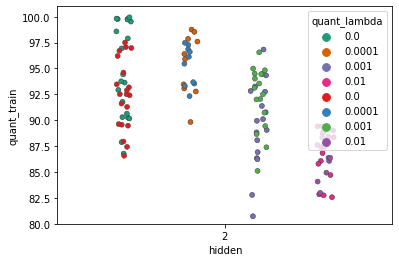

In [37]:
df2 = df[df["quant_rate"] == 0]
df2 = df2[df2["activation"] == "ReLU1"]
df2 = df2[df2["noise"] == "none"]
sns.stripplot(x = "hidden", y = "ideal", data = df2, hue="quant_lambda", palette=sns.color_palette("Dark2"), linewidth=0.5, dodge=True)
sns.stripplot(x = "hidden", y = "quant_train", data = df2, hue="quant_lambda", palette=sns.color_palette("Set1"), linewidth=0.5, dodge=True)
plt.ylim([80,101])

(80, 101)

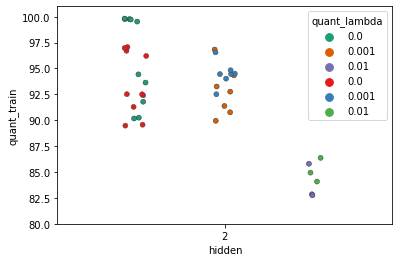

In [38]:
df2 = df[df["quant_rate"] == 0]
df2 = df2[df2["activation"] == "ReLU2"]
df2 = df2[df2["noise"] == "none"]
sns.stripplot(x = "hidden", y = "ideal", data = df2, hue="quant_lambda", palette=sns.color_palette("Dark2"), linewidth=0.5, dodge=True)
sns.stripplot(x = "hidden", y = "quant_train", data = df2, hue="quant_lambda", palette=sns.color_palette("Set1"), linewidth=0.5, dodge=True)
plt.ylim([80,101])

(80, 101)

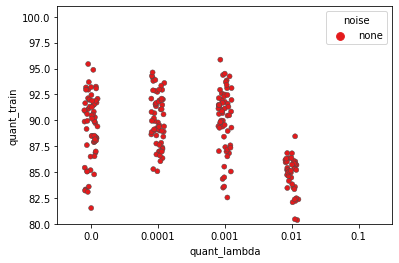

In [18]:
#sns.stripplot(x = "quant_lambda", y = "ideal", data = df2, hue="hidden", palette=sns.color_palette("Dark2"), linewidth=0.5, dodge=True)
sns.stripplot(x = "quant_lambda", y = "quant_train", data = df2, hue="noise", palette=sns.color_palette("Set1"), linewidth=0.5, dodge=True)
plt.ylim([80,101])

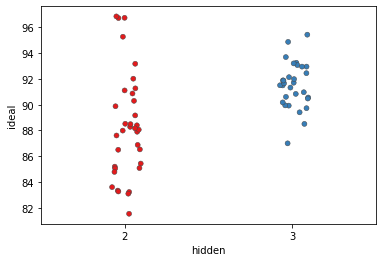

In [14]:
df3 = df[df["quant_lambda"] == 0]
#df3 = df3[df3["quant_rate"] == 0]
df3 = df3[df3["noise"] == "none"]
df3 = df3[df3["activation"] == "ReLU1"]
sns.stripplot(x = "hidden", y = "ideal", data = df3, palette=sns.color_palette("Set1"), linewidth=0.5, dodge=True)

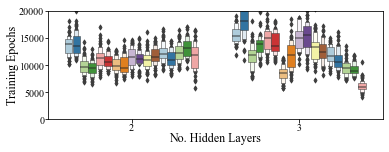

In [18]:
plot_fig(df, "epochs", file_header, size=(6,2), legend_labels = False, x_on=True, save = save_images)